# Source

In [ ]:
# https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sympy import symbols, Eq

# Configure plot

In [2]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-v0_8-pastel')

# Import dataset

In [3]:
path = './datasets/'
df = pd.read_csv(path+'insurance.csv')

In [4]:
# Shape of dataset (1338, 7)
print('Number of rows and columns in this dataset: ', df.shape)

# First 5 rows of insurance.csv
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# Dependent (target) variable in this case is charges.
# Independent variables are: age, sex, bmi, children, smoker, and region.

Number of rows and columns in this dataset:  (1338, 7)
+----+-------+--------+--------+------------+----------+-----------+-----------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |
|----+-------+--------+--------+------------+----------+-----------+-----------|
|  0 |    19 | female | 27.9   |          0 | yes      | southwest |  16884.9  |
|  1 |    18 | male   | 33.77  |          1 | no       | southeast |   1725.55 |
|  2 |    28 | male   | 33     |          3 | no       | southeast |   4449.46 |
|  3 |    33 | male   | 22.705 |          0 | no       | northwest |  21984.5  |
|  4 |    32 | male   | 28.88  |          0 | no       | northwest |   3866.86 |
+----+-------+--------+--------+------------+----------+-----------+-----------+


# The Linear Regression Equation

In [5]:

# Define the variables
theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6 = symbols('θ_0 θ_1 θ_2 θ_3 θ_4 θ_5 θ_6')
age, sex, bmi, children, smoker, region = symbols('age sex bmi children smoker region')

# Define the linear regression equation
h_theta_xi = Eq(symbols('hθ(xᵢ)'), theta_0 + age*theta_1 + sex*theta_2 + bmi*theta_3 + children*theta_4 + smoker*theta_5 + region*theta_6)

# Print the equation
print('Linear regression equation: ', h_theta_xi)

Linear regression equation:  Eq(hθ(xᵢ), age*θ_1 + bmi*θ_3 + children*θ_4 + region*θ_6 + sex*θ_2 + smoker*θ_5 + θ_0)


$$
h_{\theta}(x_i) = \theta_0 + \theta_1 \cdot \text{age} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{bmi} + \theta_4 \cdot \text{children} + \theta_5 \cdot \text{smoker} + \theta_6 \cdot \text{region}
$$

# Charge vs. BMI

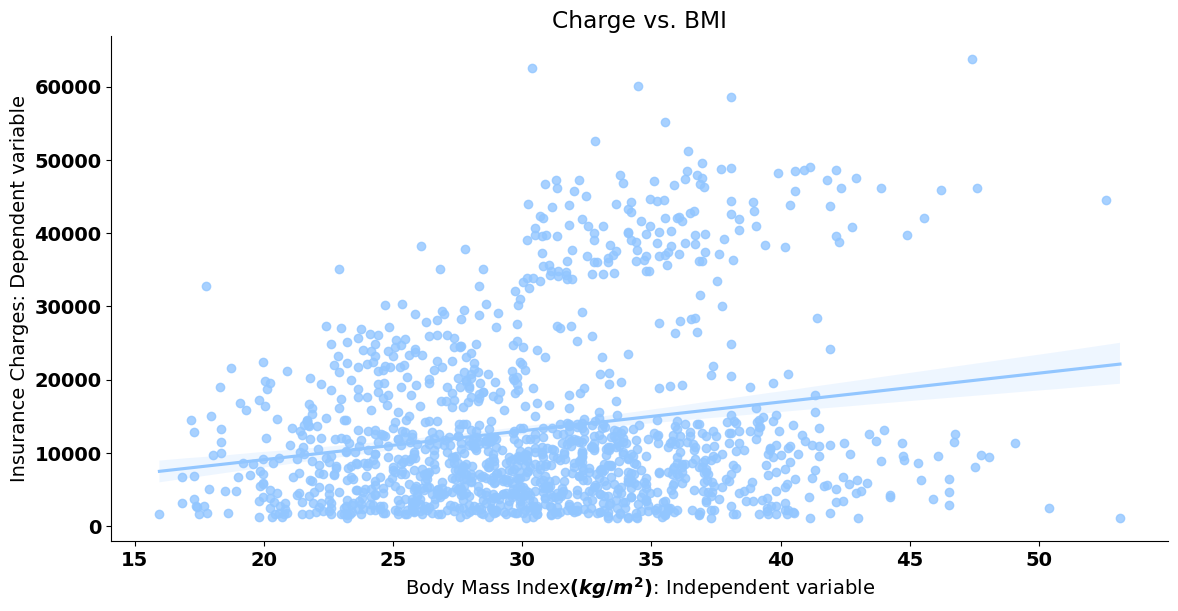

In [7]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$: Independent variable')
plt.ylabel('Insurance Charges: Dependent variable')
plt.title('Charge vs. BMI')
plt.show()

# Exploratory Data Analysis

In [ ]:
# Summary of data
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

# Check for missing values (none)
plt.figure(figsize=(12,4))
sns.barplot(df.isnull())
plt.xlabel('Variables')
plt.ylabel('Total # of Missing Values')
plt.yticks(range(0, 6, 1))
# plt.show()

# Use one-hot encoding for correlation (convert categorical columns to numeric)
df_numeric = df.select_dtypes(include=[np.number])

# Display correlation between variables (little to none)
corr = df_numeric.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
# plt.show()

# Charges vs. Children
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Charges vs. Children')
# plt.show()

# Convert the 'charges' column to numeric, coercing errors (non-numeric values) to NaN
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Confirm there are no charges of non-numeric value
print(df['charges'].isna().sum())

# Grouped aggregatgion by the number of children and aggregatgions applied to their charges
df.groupby('children').agg(['mean','min','max'])['charges']



In [ ]:

# Define the variables
theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6 = symbols('θ_0 θ_1 θ_2 θ_3 θ_4 θ_5 θ_6')
age, sex, bmi, children, smoker, region = symbols('age sex bmi children smoker region')

# Define the linear regression equation
h_theta_xi = Eq(symbols('hθ(xᵢ)'), theta_0 + age*theta_1 + sex*theta_2 + bmi*theta_3 + children*theta_4 + smoker*theta_5 + region*theta_6)

# Print the equation
print('Linear regression equation: ', h_theta_xi)

# Charge vs. BMI
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$: Independent variable')
plt.ylabel('Insurance Charges: Dependent variable')
plt.title('Charge vs. BMI')
# plt.show()

## Exploratory Data Analysis ##

# Summary of data
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

# Check for missing values (none)
plt.figure(figsize=(12,4))
sns.barplot(df.isnull())
plt.xlabel('Variables')
plt.ylabel('Total # of Missing Values')
plt.yticks(range(0, 6, 1))
# plt.show()

# Use one-hot encoding for correlation (convert categorical columns to numeric)
df_numeric = df.select_dtypes(include=[np.number])

# Display correlation between variables (little to none)
corr = df_numeric.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
# plt.show()

# Charges vs. Children
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Charges vs. Children')
# plt.show()

# Convert the 'charges' column to numeric, coercing errors (non-numeric values) to NaN
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Confirm there are no charges of non-numeric value
print(df['charges'].isna().sum())

# Grouped aggregatgion by the number of children and aggregatgions applied to their charges
df.groupby('children').agg(['mean','min','max'])['charges']

